# Biodiversity changes in Phoenix, AZ
### Author: Kylie Newcomer
Published: 12/06/2025

[GitHub Repository]('https://github.com/kylienewcomer/eds220-final-project.git)

## About
Phoenix, AZ is a rapidly growing city. As a consequence for the increase in urban area, the natural areas and green space decreae. As a result, the biodiversity would also decrease.

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr
from shapely.geometry import Polygon
import pandas as pd

from pystac_client import Client  # To access STAC catalogs

import planetary_computer  # To sign items from the MPC STAC catalog 

from IPython.display import Image 

import contextily as ctx

## Access biodiversity data
The Phoenix biodiversity data can be accessed from the Microsoft Planetary Computer STAC catalog. 

In [75]:
# Access MPC catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
collections = list(catalog.get_collections()) 
bii = catalog.get_child('io-biodiversity')
bii

<CollectionClient id=io-biodiversity>

To look at the change of biodiversity, we want to select the years of interest: 2017 and 2020

In [76]:
# Create 2017 time range
time_17 = "2017-01-01/2017-12-31"
# Create 2020 time range
time_20 = "2020-01-01/2020-12-31"

In [77]:
# Make bounding box for Phoenix
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

In [78]:
# Catalog search for 2017 dates
search_17 = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox,
    datetime = time_17)
search_17
# Get items from search
items_17 = search_17.item_collection()

# Determine number of items in search
print(f'There are {len(items_17)} items in the catalog search')

There are 1 items in the catalog search


In [79]:
# Pull out single item
item_17 = items_17[0]

In [80]:
print('ID', item_17.id)
item_17.properties

ID bii_2017_34.74464974521749_-115.38597824385106_cog


{'datetime': None,
 'proj:shape': [7992, 7992],
 'end_datetime': '2017-12-31T23:59:59Z',
 'proj:transform': [0.0008983152841195215,
  0.0,
  -115.38597824385106,
  0.0,
  -0.0008983152841195215,
  34.74464974521749,
  0.0,
  0.0,
  1.0],
 'start_datetime': '2017-01-01T00:00:00Z',
 'proj:code': 'EPSG:4326'}

We can use `rioxarray` to access the assets from the item data.

In [81]:
bii_17 = rioxr.open_rasterio(item_17.assets['data'].href)
bii_17

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [82]:
# Remove `band` dimension
bii_17 = bii_17.squeeze().drop_vars('band')
print("Dimensions: ", dict(bii_17.sizes))

Dimensions:  {'y': 7992, 'x': 7992}


Now that we have some information about the 2017 raster, we can look at the image.

In [83]:
Image(url = item_17.assets['rendered_preview'].href)

Let's repeat those steps to look at the data from 2020

In [84]:
# Catalog search for 2020 dates
search_20 = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox,
    datetime = time_20)
search_20
# Get items from search
items_20 = search_20.item_collection()

# Determine number of items in search
print(f'There are {len(items_20)} items in the catalog search')

There are 1 items in the catalog search


In [85]:
# Pull out single item
item_20 = items_20[0]

In [86]:
print('ID', item_20.id)
item_20.properties

ID bii_2020_34.74464974521749_-115.38597824385106_cog


{'datetime': None,
 'proj:shape': [7992, 7992],
 'end_datetime': '2020-12-31T23:59:59Z',
 'proj:transform': [0.0008983152841195215,
  0.0,
  -115.38597824385106,
  0.0,
  -0.0008983152841195215,
  34.74464974521749,
  0.0,
  0.0,
  1.0],
 'start_datetime': '2020-01-01T00:00:00Z',
 'proj:code': 'EPSG:4326'}

In [87]:
item_20.assets

{'data': <Asset href=https://pcdata01euw.blob.core.windows.net/impact/bii-v1/bii_2020/bii_2020_34.74464974521749_-115.38597824385106_cog.tif?st=2025-12-05T20%3A25%3A09Z&se=2025-12-06T21%3A10%3A09Z&sp=rl&sv=2025-07-05&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2025-12-05T06%3A34%3A50Z&ske=2025-12-12T06%3A34%3A50Z&sks=b&skv=2025-07-05&sig=W1iab5dMd8F/kHuXllgTMmsWaoHfJXsiIdBtb0XDgjQ%3D>,
 'tilejson': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/tilejson.json?collection=io-biodiversity&item=bii_2020_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.97%2A%28data_b1%2A%2A3.84%29&format=png>,
 'rendered_preview': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=io-biodiversity&item=bii_2020_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.97

In [88]:
bii_20 = rioxr.open_rasterio(item_20.assets['data'].href)
bii_20

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [89]:
# Remove `band` dimension
bii_20 = bii_20.squeeze().drop_vars('band')
print("Dimensions: ", dict(bii_20.sizes))

Dimensions:  {'y': 7992, 'x': 7992}


In [90]:
Image(url = item_20.assets['rendered_preview'].href)

Phoenix Subdivision

In [91]:

az = gpd.read_file('data/tl_2024_04_cousub/tl_2024_04_cousub.shp')

In [92]:
az.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,005,91198,01934931,0400591198,0600000US0400591198,Flagstaff,Flagstaff CCD,22,Z5,G4040,S,12231962349,44576380,+35.1066122,-111.3662507,"POLYGON ((-112.13370 35.85596, -112.13368 35.8..."
1,04,005,91838,01934953,0400591838,0600000US0400591838,Kaibab Plateau,Kaibab Plateau CCD,22,Z5,G4040,S,7228864156,29327221,+36.5991097,-112.1368033,"POLYGON ((-112.66039 36.53941, -112.66033 36.5..."
2,04,005,91683,01934950,0400591683,0600000US0400591683,Hualapai,Hualapai CCD,22,Z5,G4040,S,2342313339,3772690,+35.9271665,-113.1170408,"POLYGON ((-113.35416 36.04097, -113.35416 36.0..."
3,04,023,92295,01934961,0402392295,0600000US0402392295,Nogales,Nogales CCD,22,Z5,G4040,S,1762339489,2382710,+31.4956020,-111.0171332,"POLYGON ((-111.36692 31.52136, -111.36316 31.5..."
4,04,023,92550,01934966,0402392550,0600000US0402392550,Patagonia,Patagonia CCD,22,Z5,G4040,S,1439560139,685527,+31.5664619,-110.6410279,"POLYGON ((-110.96273 31.68695, -110.96251 31.6..."


In [93]:
az.dtypes

STATEFP       object
COUNTYFP      object
COUSUBFP      object
COUSUBNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [94]:
# Look at unique subdivision names
az['NAME'].unique()

array(['Flagstaff', 'Kaibab Plateau', 'Hualapai', 'Nogales', 'Patagonia',
       'Hopi', 'Tuba City', 'Clifton', 'Duncan', 'Chandler', 'Phoenix',
       'Tonto National Forest', 'Gila Bend', 'Wickenburg', 'Deer Valley',
       'Buckeye', 'St. Johns', 'Salt River', 'Tucson', 'Arivaca',
       'Indian Wells', 'Winslow-Holbrook', 'Snowflake', 'Kayenta',
       'Lake Havasu City', 'Fort Apache', 'Bisbee', 'Bowie', 'Willcox',
       'North Mohave', 'Kingman', 'Bullhead City', 'Congress',
       'Mingus Mountain', 'Florence', 'North Pinal', 'San Manuel', 'Eloy',
       'Chinle', 'Sweetwater', 'Fort Defiance', 'Dennehotso', 'Puerco',
       'Ash Fork', 'Cordes Lakes-Mayer', 'Camp Verde-Sedona', 'Prescott',
       'Piñon', 'Payson', 'Winkelman', 'Globe-Miami', 'Tonto Basin',
       'Gila River', 'Casa Grande', 'Maricopa-Stanfield',
       "Tohono O'odham Nation", 'Coolidge', 'Ajo', 'Marana', 'Somerton',
       'Bonita-Klondyke', 'Eagar-Springerville', 'San Carlos',
       'Havasupai', 'William

In [95]:
phoenix = az[az['NAME'] == "Phoenix"]
phoenix

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
10,04,013,92601,01934968,0401392601,0600000US0401392601,Phoenix,Phoenix CCD,22,Z5,G4040,S,2806483087,9458600,+33.5211331,-112.0284405,"POLYGON ((-112.47014 33.55996, -112.47011 33.5..."


<Axes: >

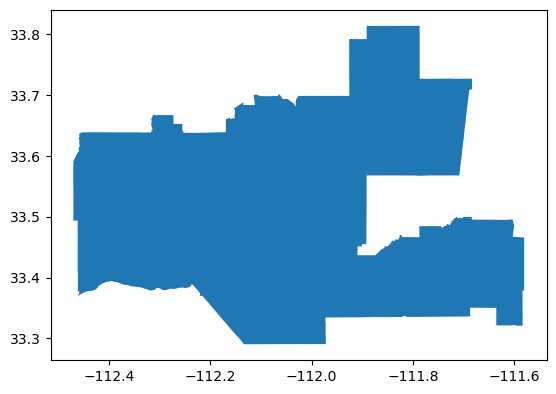

In [96]:
phoenix.plot()

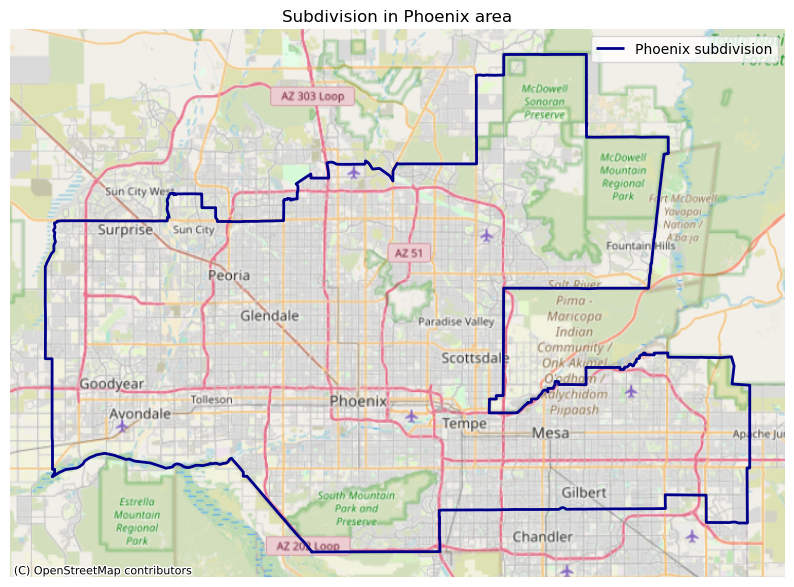

In [97]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.axis('off')

phoenix.plot(ax = ax,
            color = "none")

phoenix.boundary.plot(ax=ax,
                color = "darkblue",
                linewidth = 2,
                label = "Phoenix subdivision")
plt.legend()

# Use contextily for basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik,
               crs = phoenix.crs)

plt.title('Subdivision in Phoenix area')

plt.show()


Biodiversity in Phoenix subdivision

In order to combine the biodiversity and phoenix boundary data, we need to match the CRS. For effeciency, we have previously confirmed the 2017 and 2020 biodiversity match, so we only need to do one transformation.

In [98]:
# Change Phoenix CRS to match BII
phoenix = phoenix.to_crs(bii_17.rio.crs)

# Check that Phoenix subdivsion crs has changed
assert phoenix.crs == bii_17.rio.crs

In [99]:
clip_bii_17 = bii_17.rio.clip_box(*phoenix.total_bounds).rio.clip(phoenix.geometry)

We can plot the clipped raster to confirm it worked

In [ ]:
clip_bii_17.plot()

Let's clip BII 2020

In [104]:
clip_bii_20 = bii_20.rio.clip_box(*phoenix.total_bounds).rio.clip(phoenix.geometry)

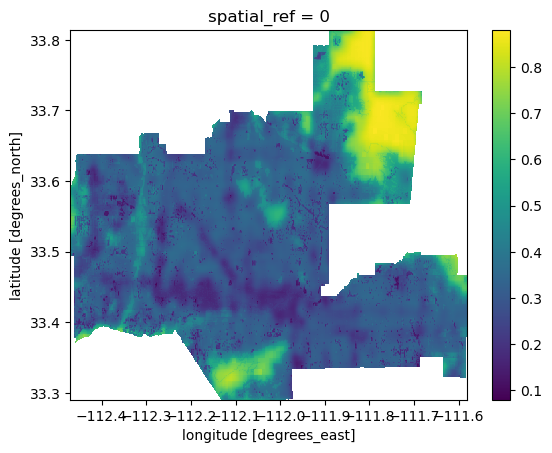

In [105]:
clip_bii_20.plot()

## Identify where biodiversity is >= 0.75

In [125]:
bii_values = np.unique(clip_bii_17, return_counts=True)


d = {'bii' : pd.Series(bii_values[0]),
     'count' : pd.Series(bii_values[1])
     }

cells_17 = pd.DataFrame(d)
cells_17

,bii,count
0,0.070590,1
1,0.071102,1
2,0.071198,1
3,0.071554,1
4,0.071961,1
...,...,...
330085,0.880174,1
330086,0.880183,1
330087,0.880198,1
330088,0.880218,1


Now we have the number of cells with each biodiversity index value in 2017. We can also see there are a lot of NA's that should be dealt with. Lets so this again for the 2020 values.

In [124]:
bii_values2 = np.unique(clip_bii_20, return_counts=True)


d2 = {'bii' : pd.Series(bii_values2[0]),
     'count' : pd.Series(bii_values2[1])
     }

cells_20 = pd.DataFrame(d2)
cells_20

,bii,count
0,0.080150,1
1,0.085542,1
2,0.090434,1
3,0.092371,1
4,0.092681,1
...,...,...
330671,0.880174,1
330672,0.880183,1
330673,0.880198,1
330674,0.880218,1


Again, a lot of NA's. Let's replace those with 0's

In [130]:
cells_17 = cells_17.fillna(0)
cells_20 = cells_20.fillna(0)

In [ ]:
# Make sure all na values are gone
assert cells_17.isna().sum().all() == 0
assert cells_20.isna().sum().all() == 0

In [ ]:
cells_17[cells_17['bii'] >= 0.75]

24133.0